<a href="https://colab.research.google.com/github/jebalisoumaya/Projet_IA/blob/main/Heat_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notre Datset est issu du site de l'UCI Machine Learning. elle contient des informations médicales sur des patients ainsi que les résultats de diagnostic indiquant si un patient est atteint de maladies cardiaques.

Groupe 2 : Soumaya, Hoda, Miguel, Souhir et Chaimae

# **imports**

In [ ]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b2c331087f93207033009577841d1229b9a1ed9038428d70c3b86091f6be954d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.linear_model import LogisticRegression
import plotly.express as px
import plotly.graph_objects as go
from ydata_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier



# **Data Prep**

In [ ]:
df = pd.read_csv("heart.csv")


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Dataset Description**

Age: Patient age in years.

Sex: Gender of the patient (0 = male, 1 = female).

cp: Type of chest pain (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).

trestbps: Resting blood pressure in mm Hg.

chol: Serum cholesterol in mg/dl.

fbs: Fasting blood sugar (1 = true if >120 mg/dl, 0 = false).

restecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

thalach: Maximum heart rate achieved.

exang: Exercise-induced angina (0 = no, 1 = yes).

oldpeak: ST depression induced by exercise relative to rest.

slope: Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).

ca: Number of major vessels (0–4) colored by fluoroscopy.

thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).

Target: Indicates if the patient has heart disease (0 = no, 1 = yes)

In [ ]:
#ãrbre de decision plus simple ,en fonction des var/ train en fonction 3/4 params

In [ ]:
df.info()
# our database only contains numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()
#no null values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()
#nol missing values and dropped the duplicates so database clean so fat

0



---



---



# **Data Analysis**

In [ ]:
color_line = '#1f77b4'

ProfileReport(df, title='Heart Disease Dataset Report', minimal=True, progress_bar=False,
              samples=None, correlations=None, interactions=None, explorative=True,
              notebook={'iframe':{'height': '600px'}},
              html={'style':{'primary_color': color_line}},
              missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()




---
Correlation

---




In [ ]:
correlation_matrix = df.corr()

# Display Correlation Matrix
print("Correlation Matrix:")
correlation_matrix


Correlation Matrix:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


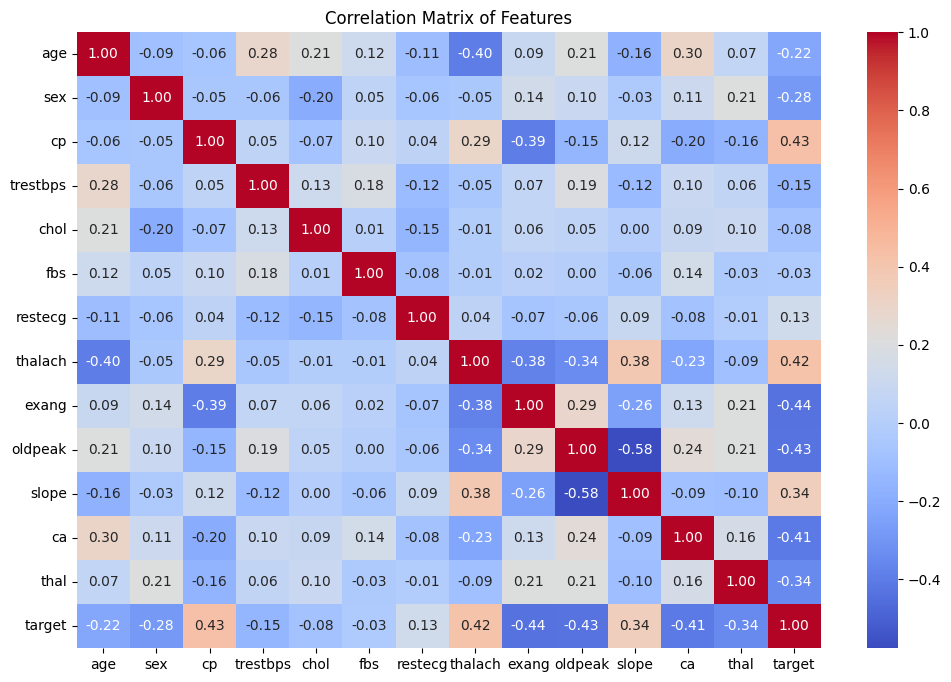

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()



---



---



Analysis of Correlation Values:

Strong Positive Correlation:

Indicates a moderate positive correlation with the target.

* cp (0.432080)
* thalach (0.419955)
* slope (0.343940)

Weak or Negligible Correlation:

* restecg (0.134874)
* fbs, chol have correlations close to zero and may not contribute much.

Negative Correlation:

* oldpeak (-0.429146), exang (-0.435601), ca (-0.408992), and thal (-0.343101): Strong negative correlations, which could also be important predictors in classification tasks.

Less Important Features:

* age, sex, trestbps, chol: These have weak negative correlations.

In [ ]:
total_patients = df.shape[0] #Nombre total de patients

patients_with_heart_disease = df[df['target'] == 1].shape[0] # Affiche le nombre de patients atteints de maladie cardiaque

patients_without_heart_disease = df[df['target'] == 0].shape[0] # Affiche le nombre de patients pas atteints de maladie cardiaque

average_age = df['age'].mean() # Affiche l'âge moyen des patients

min_age = df['age'].min() # Affiche l'âge minimum des patients
max_age = df['age'].max()# Affiche l'âge maximum des patients
age_std = df['age'].std() # Affiche l'écart type de l'âge des patients

mean_cholesterol = df['chol'].mean() # Affiche le cholestérol moyen des patients
mean_trestbps = df['trestbps'].mean() # Affiche le taux de pression artérielle moyen des patients
mean_max_heart_rate = df['thalach'].mean()# Affiche la fréquence cardiaque maximale moyenne des patients

femmes_atteintes = df[(df['sex'] == 0) & (df['target'] == 1)].shape[0] # Affiche le nombre de femmes atteintes de maladie cardiaque

hommes_atteints= df[(df['sex'] == 1) & (df['target'] == 1)].shape[0] # Affiche le nombre d'hommes atteint de maladie cardiaque

sample_data = df[['age', 'chol', 'sex', 'target']].head()

print(f"Nombre total de patients : {total_patients}")
print(f"Nombre de patients atteints de maladie cardiaque : {patients_with_heart_disease}")
print(f"Nombre de patients non atteints de maladie cardiaque : {patients_without_heart_disease}")
print(f"Moyenne d'âge des patients : {average_age:.2f} ans")
print(f"Âge minimum : {min_age} ans, Âge maximum : {max_age} ans, Écart-type : {age_std:.2f} ans")
print(f"Moyenne du cholestérol : {mean_cholesterol:.2f} mg/dl")
print(f"Moyenne de la pression artérielle : {mean_trestbps:.2f} mmHg")
print(f"Moyenne de la fréquence cardiaque maximale : {mean_max_heart_rate:.2f} bpm")
print(f"Nombre de femmes atteintes de la maladie cardiaque : {femmes_atteintes}")
print(f"Nombre d'hommes atteints de la maladie cardiaque : {hommes_atteints}")
print("\nExemples de données de patients :")
print(sample_data)

Nombre total de patients : 302
Nombre de patients atteints de maladie cardiaque : 164
Nombre de patients non atteints de maladie cardiaque : 138
Moyenne d'âge des patients : 54.42 ans
Âge minimum : 29 ans, Âge maximum : 77 ans, Écart-type : 9.05 ans
Moyenne du cholestérol : 246.50 mg/dl
Moyenne de la pression artérielle : 131.60 mmHg
Moyenne de la fréquence cardiaque maximale : 149.57 bpm
Nombre de femmes atteintes de la maladie cardiaque : 72
Nombre d'hommes atteints de la maladie cardiaque : 92

Exemples de données de patients :
   age  chol  sex  target
0   63   233    1       1
1   37   250    1       1
2   41   204    0       1
3   56   236    1       1
4   57   354    0       1


# **Classification**

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for KNN (optional for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---
Logistic regression

---




In [ ]:
model = LogisticRegression() #Regression logistique

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8197

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



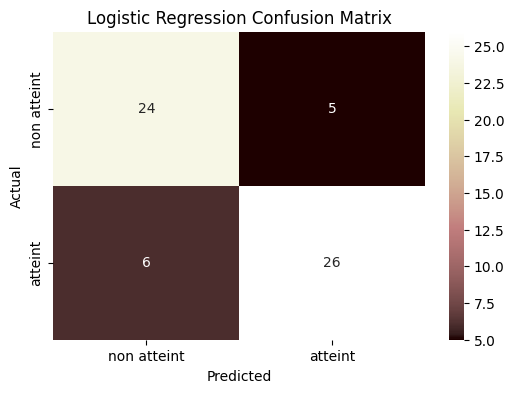

In [ ]:
logistic_cm = confusion_matrix(y_test, y_pred)
labels = ['non atteint', 'atteint']

plt.figure(figsize=(6, 4))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='pink',
            xticklabels=labels, yticklabels=labels)
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

True Negatives (TN) :

Nombre de patients réellement non atteints (0) que le modèle a correctement prédits comme non atteints.
Exemple : Le modèle prédit qu'un patient n'a pas de maladie cardiaque, et c'est vrai.

False Positives (FP) :

Nombre de patients réellement non atteints (0) que le modèle a incorrectement prédits comme atteints (1).
Exemple : Le modèle prédit qu'un patient a une maladie cardiaque, mais en réalité, il n'en a pas.

False Negatives (FN) :

Nombre de patients réellement atteints (1) que le modèle a incorrectement prédits comme non atteints (0).
Exemple : Le modèle prédit qu'un patient n'a pas de maladie cardiaque, mais en réalité, il en a une.

True Positives (TP) :

Nombre de patients réellement atteints (1) que le modèle a correctement prédits comme atteints (1).
Exemple : Le modèle prédit qu'un patient a une maladie cardiaque, et c'est vrai.



---
Analyse de la matrice de confusion du Logistic Regression Model

True Negatives (TN) = 25

Le modèle a correctement identifié 23 patients comme non atteints (réellement non atteints).

False Positives (FP) = 4

Le modèle a prédit que 6 patients étaient atteints, alors qu'ils ne l'étaient pas (faux positifs/faux diagnostique).

False Negatives (FN) = 4

Le modèle a prédit que 9 patients étaient non atteints, alors qu'ils étaient réellement atteints (faux négatifs / des patients malades sont manqués, ce qui pourrait retarder leur traitement.).

True Positives (TP) = 28

Le modèle a correctement identifié 23 patients comme atteints.




In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy: 0.8688524590163934


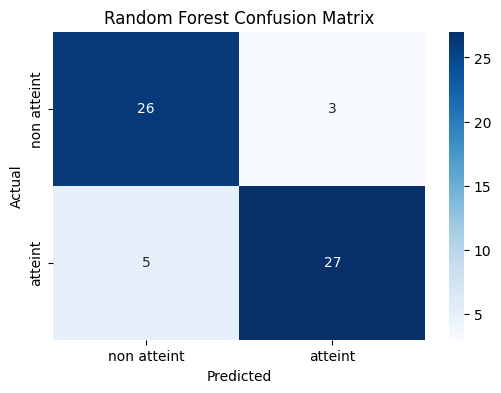

In [ ]:
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 4))
labels = ['non atteint', 'atteint']
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

True Negatives (TN) = 26 :

Le modèle a correctement identifié 26 patients comme non atteints (réellement non atteints).
False Positives (FP) = 3 :

Le modèle a prédit que 3 patients étaient atteints, alors qu'ils ne l'étaient pas (faux positifs).
False Negatives (FN) = 5 :

Le modèle a prédit que 5 patients étaient non atteints, alors qu'ils étaient réellement atteints (faux négatifs).
True Positives (TP) = 27 :

Le modèle a correctement identifié 27 patients comme atteints.



---
KNN


---




In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn_predictions = knn_model.predict(X_test_scaled)
print("\nKNN Results:")
print(classification_report(y_test, knn_predictions))
print("Accuracy:", accuracy_score(y_test, knn_predictions))


KNN Results:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Accuracy: 0.819672131147541


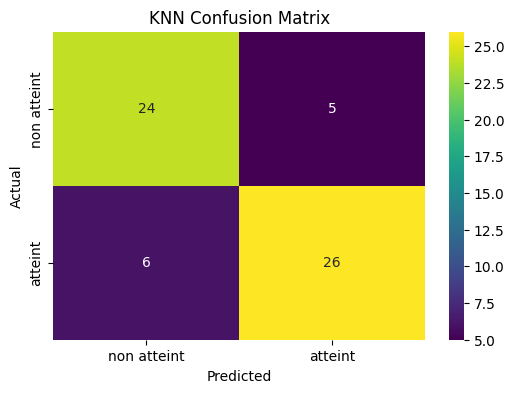

In [ ]:
knn_cm = confusion_matrix(y_test, knn_predictions)
labels = ['non atteint', 'atteint']

plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='viridis',xticklabels=labels, yticklabels=labels)
plt.title("KNN Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

True Negatives (TN) = 24 :

Le modèle a correctement identifié 24 patients comme non atteints

False Positives (FP) = 5 :

Le modèle a prédit que 5 patients étaient atteints, alors qu'ils ne l'étaient pas

False Negatives (FN) = 6 :

Le modèle a prédit que 6 patients étaient non atteints, alors qu'ils étaient réellement atteints

True Positives (TP) = 26 :

Le modèle a correctement identifié 26 patients comme atteints.



---
SVC

---





In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)

print("Best Accuracy from GridSearchCV:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)

print("Test Set Accuracy:", test_accuracy)


Best Parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy from GridSearchCV: 0.8424319727891157
Test Set Accuracy: 0.8360655737704918



Cross-Validation Accuracy: Mean = 0.84, Std = 0.03

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



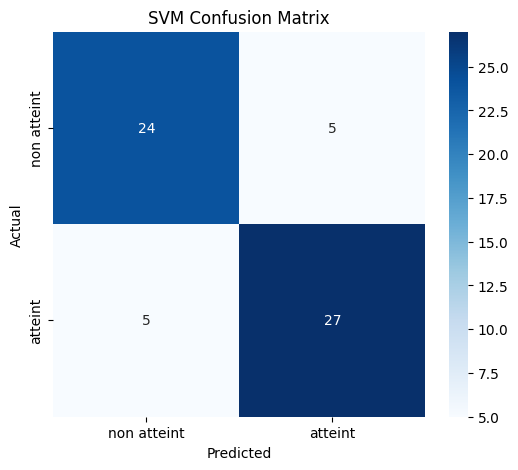

In [ ]:
# Initialize and train the SVM model with the best parameters from GridSearchCV
svm_model = grid_search.best_estimator_

cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: Mean = {cv_scores.mean():.2f}, Std = {cv_scores.std():.2f}")

y_pred = svm_model.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['non atteint', 'atteint']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.title("SVM Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()



Le modèle a correctement identifié 25 patients comme non atteints

Le modèle a prédit que 4 patients étaient atteints, alors qu'ils ne l'étaient pas

Le modèle a prédit que 4 patients étaient non atteints, alors qu'ils étaient réellement atteints

Le modèle a correctement identifié 28 patients comme atteints.

Best Parameters from GridSearchCV: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Accuracy from GridSearchCV: 0.8465136054421769
Model Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



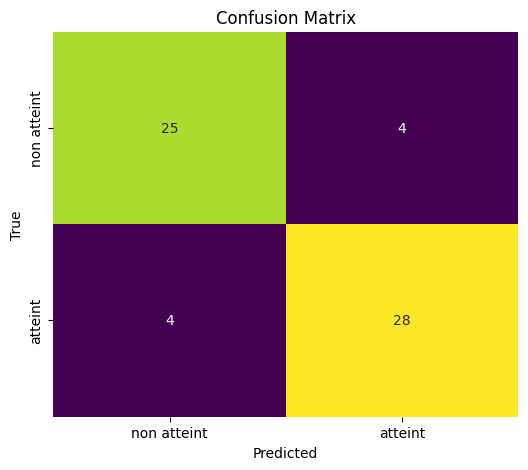

In [ ]:
from xgboost import XGBClassifier
# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42)

# GridSearchCV with Cross-Validation for model selection
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Fit the grid search model
grid_search_xgb.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print("Best Parameters from GridSearchCV:", grid_search_xgb.best_params_)

# Best accuracy score from GridSearchCV
print("Best Accuracy from GridSearchCV:", grid_search_xgb.best_score_)

# Get the best estimator (model) after grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions using the best model
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model by calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate and display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with custom styling
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['non atteint', 'atteint'],
            yticklabels=['non atteint', 'atteint'], cbar=False)

# Add labels and title to the confusion matrix plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Le modèle a correctement identifié 25 patients comme non atteints de maladie cardiaque.

Le modèle a prédit que 4 patients étaient atteints alors qu'ils n'étaient pas atteints

Le modèle a prédit que 4 patients étaient non atteints, mais ils étaient en réalité atteints

Le modèle a correctement identifié 28 patients comme atteints.



---
Evaluation globale

---




in this dataset a balanced dataset (1- 165, 0-138) : The class distribution is approximately 54% to 46%

Metrics like accuracy and F1-score should still provide meaningful insights into model performance since the imbalance is negligible. + confusion matrix to ensure that the model doesn't favor one class too strongly



*  Accuraccy:  Proportion de prédictions correctes par rapport au nombre total de prédictions.
*  Précision : Proportion des prédictions positives correctes parmi toutes les prédictions positives. ( Évite les faux positifs dans les diagnostic)

*   Recall : Proportion des vrais positifs détectés parmi toutes les observations positives réelles. (Réduit les faux négatifs (ne pas manquer un malade))
*    F1 score: Moyenne harmonique entre précision et rappel. Évalue l'équilibre entre ces deux métriques.







Resultat

---



Meilleur F1-score : XGBoost (0.87) se démarque légèrement des autres modèles.

Meilleure accuracy globale : XGBoost (87%).

Les autres modèles (KNN, Logistic Regression, et SVC) atteignent une performance similaire, autour de 85%, mais sont légèrement inférieurs à XGBoost.

# Decision Tree

Accuracy sur l'ensemble de test : 0.84


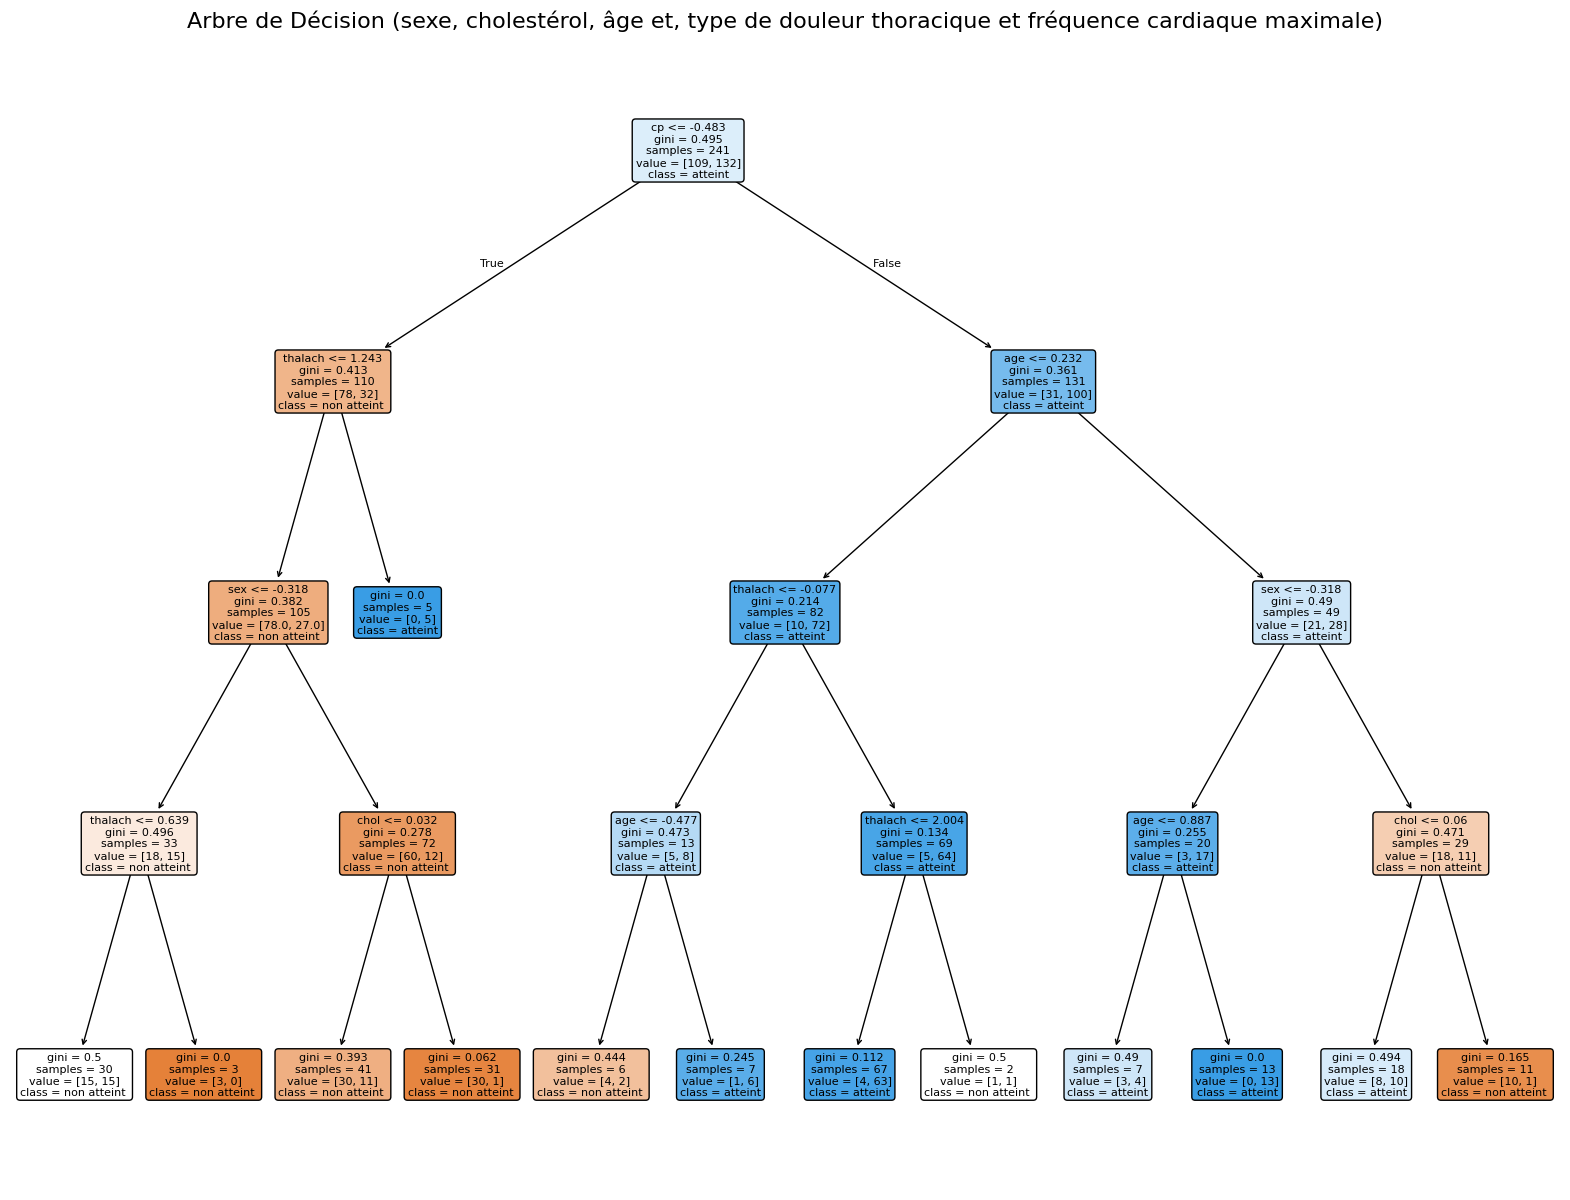

In [139]:

features = ['sex', 'chol', 'age', 'cp','thalach']
X_selected = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création d'un Arbre de Décision
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=4)
decision_tree.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = decision_tree.predict(X_test_scaled)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy sur l\'ensemble de test : {accuracy:.2f}')

# Visualisation de l'arbre de décision avec des ajustements
plt.figure(figsize=(20, 15))
tree.plot_tree(
    decision_tree,
    feature_names=features,
    class_names=["non atteint ", "atteint"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Arbre de Décision (sexe, cholestérol, âge et, type de douleur thoracique et fréquence cardiaque maximale)", fontsize=16)
plt.show()


Critère clé de décision : Le critère cp semble être un facteur déterminant dans la classification des individus, suivi par thalach et age.

Branche "True" (cp <= -0.0483 et thalach <= 1.243) : Si le critère sur thalach est vrai (fréquence cardiaque inférieure ou égale à 1.243), la classe prédite est "non atteint" (78 "non atteint" et 32 "atteints").

Gini = 0.413 : Ce sous-ensemble est plus pur que celui du premier nœud, avec une majorité de prédictions correctes pour "non atteint".

Branche "False" (cp > -0.0483 et age <= 0.232) : Si le critère sur cp est faux, l'arbre se divise sur age, avec un seuil de 0.232. Si age <= 0.232, la classe prédite est "atteint".

Gini = 0.361 : Ce sous-ensemble est encore plus pur, avec une majorité de "atteints" dans ce groupe.

In [ ]:

class_report = classification_report(y_test, y_pred, target_names=["non atteint", "atteint"])
print("\nRapport de Classification:")
print(class_report)


Rapport de Classification:
              precision    recall  f1-score   support

 non atteint       0.79      0.90      0.84        29
     atteint       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



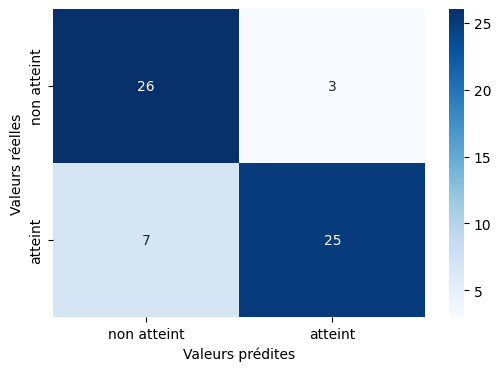

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["non atteint", "atteint"], yticklabels=["non atteint", "atteint"])
plt.ylabel("Valeurs réelles")
plt.xlabel("Valeurs prédites")
plt.show()



In [ ]:
conf_matrix

array([[26,  3],
       [ 7, 25]])

# **Clustering**






---



---



 - start by using all variables  :


1.   Kmeans without PCA
2.   Kmeans with PCA (réduction de dimensilaité)

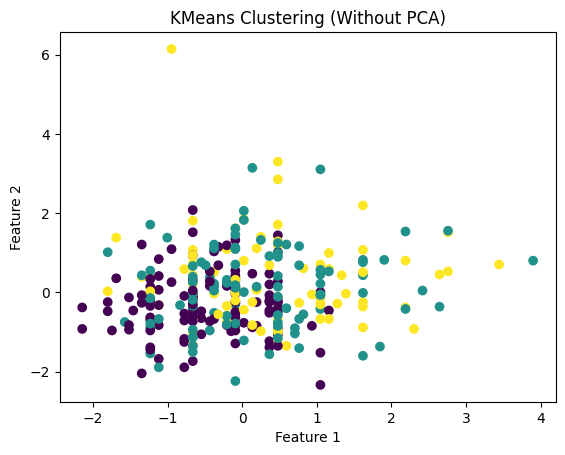

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Use all features for clustering (initial step)
X = df.drop(columns=['target'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 3], X_scaled[:, 4], c=y_kmeans, cmap='viridis')
plt.title("KMeans Clustering (Without PCA)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Commentaire pour le graph KMean without PCA :
3 clusters : violet, jaune et turquois. Les clusters ne sont pas bien séparés et se chevauchent entre eux.
Le centre est compris entre environ -1 et 1 --> données sont élevées ici.
Quelques points jaunes et verts sont éloignées du centre : hypothese : outliers ou data difficile à classer.
2 axes : limites la visualisation, ne permet pas une séparation claire

Plus loins : limite entre clusters invisible ( soit d'autres variables doivent etre prises en comptes, soit mal fait le découpage) ; le PCA permettrait d'avoir une meilleure visualisation.

Conclusion : Permet d'avoir un premier aperçu des données, mais il faut trouver une solution pour clarifier les différents clusters.


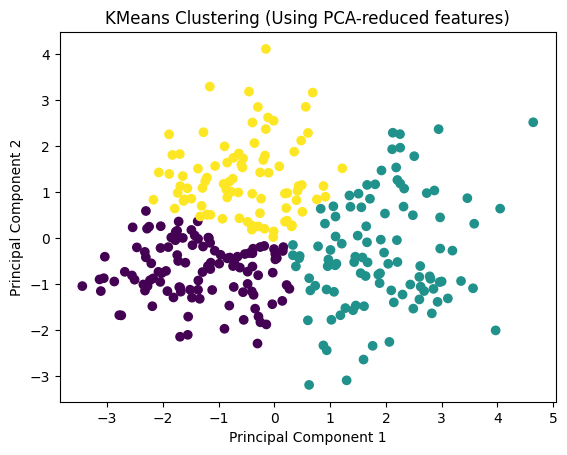

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use all features for clustering (initial step)
X = df.drop(columns=['target'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Apply PCA to reduce the dimensionality to 2 for better visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title("KMeans Clustering (Using PCA-reduced features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
#Kmean avec deux clusters/ pour pouvoir identifier / 3 groupes ou 4 ...

Commentaire pour KMeans PCA reduced features :
KMeans + réduction de dimension avec la PCA (réduit les caractéristiques originales à seulement deux composantes principales)
- Avec l'algo PCA  + (PC1 et PC2): 3 clusters bien définis et séparés, chaque couleurs est regroupes meme si y'a certains points qui sont un peu loin.
- Violet : données compactes (similaires)
- jaune et turquois: données éparpiller beaucoup d'écarts (dispersion)

Conclusion :
--> Regroupement plus clair, certaines données sont trop regroupées ex: jaune et violet
Kmeans + PCA : montre des insights supplémentaire sur la nature de notre data

In [ ]:
pca_components = pca.components_
pca_df = pd.DataFrame(pca_components, columns=X.columns, index=[f"PC{i+1}" for i in range(pca_components.shape[0])])
print(pca_df)


          age       sex        cp  trestbps      chol       fbs   restecg  \
PC1  0.313267  0.093922 -0.272530  0.184876  0.113827  0.074016 -0.125403   
PC2  0.407848 -0.371002  0.298938  0.437181  0.362194  0.318404 -0.218611   

      thalach     exang   oldpeak     slope        ca     thal  
PC1 -0.414481  0.358532  0.417687 -0.376377  0.291653  0.22115  
PC2  0.080825 -0.266081 -0.055946  0.055267  0.111171 -0.19823  


Commentaire pca_components tableau : permet de voir l'influence des variables sur les PC1 et 2

- PC1 : age, exang, ca, thal, trestbps et chol
- PC2 : age, cp, trestbps, chol, fbs
Rq : nos clusters sont influencés par ces variables, si les valeurs sont proches, ils sont dans le meme groupe
Conclusion:
- PCA ; meilleurs divisions des clusters, simplification du modèle, variables significatives

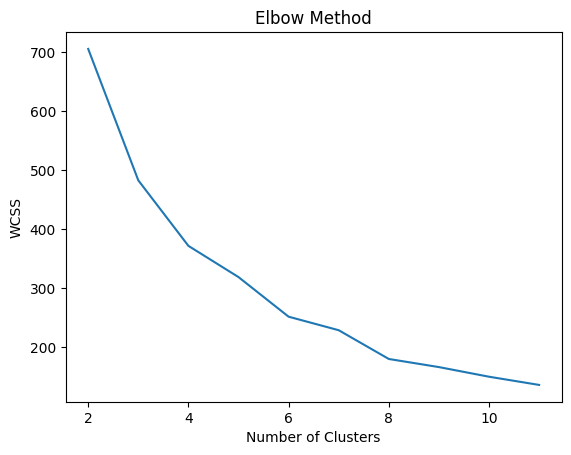

In [ ]:
# trouver le nombre de cluster optimal
wcss = []

for i in range(2, 12):  # Trying cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 12), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Commentaire Graphique : Within-Cluster Sum of Squares --> Goal : nombre optimal de cluster en idenfitiant un point ou la reduction de la variance est - significative.

Observation:  
- WCSS diminue qd nombre Clusters augmentent (normal car la variance intra cluster diminue)
- cluster entre 2 et 4 : data bien regroupées ici
- 3 (plus simple) ou 4 clusters semblent etre un peu le nombre optimal de cluster meme si cela n'est pas tres clair / prononcer comme démarquation
- Apres 4 clusters : ca ne sert à rien d'augmenter le nombre de cluster car ça n'améliore pas la segmentation de notre data

In [ ]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.37


Commentaire Silhouette score : métrique qui permet de savoir la qualité des clusters obtenus.
Dans notre cas, il est proche de 0 : les points se chevauchent et/ ou sont mal assignées (ambiguité)  --> hypothèse :  soit des données intrinsèquement difficiles à regrouper, soit nombre de cluster à revoir
Concernant la qualité : 0,36 correspond à une qualité modéré de cluster

Remarque : ces clusters formés peuvent nous fournir des informations utiles mais il faudrait rajouter un autre test pour etre sure (ex: DBSCAN) et valider nos clusters

Conclusion : Clusters avec structure modérées mais ambigu, interpretation des résultats nécessitent d'etre prudent car certaines données peuvent etre mal classées

Un score de 0,38 indique que les clusters sont quelque peu bien formés, mais pas particulièrement solides. Il existe une séparation modérée entre les clusters, mais certains points peuvent être plus proches d'autres clusters, ce qui suggère une certaine ambiguïté dans le regroupement.

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_pca)
score = silhouette_score(X_pca, y_dbscan)
print(f"DBSCAN Silhouette Score: {score:.3f}")


DBSCAN Silhouette Score: 0.285


DBSCAN : algo clustering sur la densité
DBSCAN (0,291) < KMeans (0,36) --> moins bien défini que Kmeans
Ici KMEANS est plus adapté car on a des clusters plus cohérent
On aurait choisit DBSCAN si nos clusters avaient une structure irrégulière

Avec ces scores proches, KMeans semble être une meilleure option pour cette analyse, mais aucun des deux modèles ne montre une séparation de clusters forte.



---



---



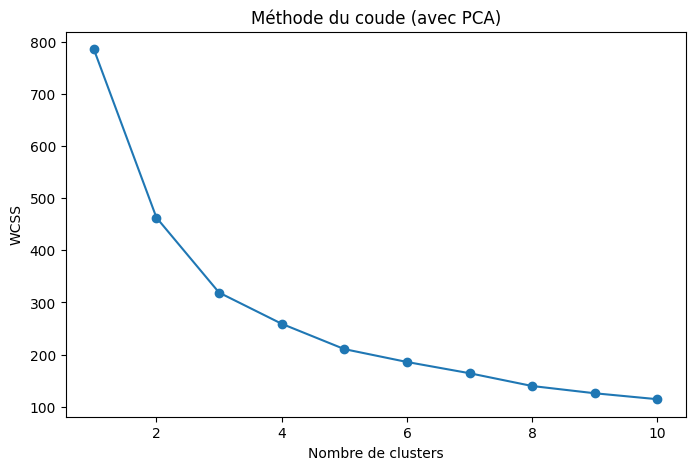

Silhouette Score avec PCA : 0.37


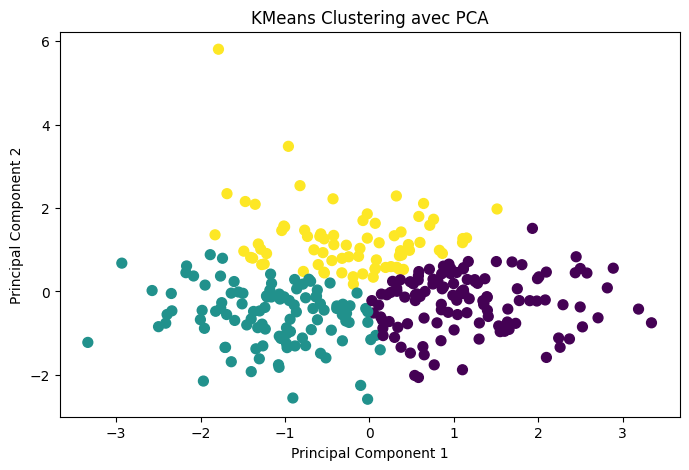

Composantes principales (PCA) :
[[-0.58683037  0.42639636 -0.27457833  0.63120757]
 [ 0.29767068  0.4520657   0.78115524  0.31116758]]


In [ ]:
# Sélection des features pertinentes
selected_features = ['age', 'cp', 'chol', 'thalach']
X_subset = df[selected_features]

# Standardisation des données
scaler = StandardScaler()
X_scaled_subset = scaler.fit_transform(X_subset)

# Réduction des dimensions avec PCA
pca = PCA(n_components=2)  # Réduire à 2 composantes pour visualisation
X_pca = pca.fit_transform(X_scaled_subset)

# Trouver le nombre optimal de clusters avec la méthode du coude
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Méthode du coude (avec PCA)")
plt.xlabel("Nombre de clusters")
plt.ylabel("WCSS")
plt.show()

# Appliquer KMeans avec le nombre optimal de clusters (par exemple 3)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Calcul du Silhouette Score
sil_score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score avec PCA : {sil_score:.2f}")

# Visualisation des clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title("KMeans Clustering avec PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Affichage des composantes principales pour analyse
print("Composantes principales (PCA) :")
print(pca.components_)

Commentaire Récapitulatif :

Graphique PCA : identification du nombre de cluster optimal pour segmenter les données
coude clair qd cluster = 3 --> notre choix optimal (pas nécessaire d'ajouter des clusters)

Graphique KMEANS :
Cluster bien séparer donc notre segmentation est cohérente, meme si qlq points sont proches
Silhouette score de 0,37 : séparation modérées des points mais qlq autres points ambigu (mal séparés)
Les variables ont un impact sur la variance
La PCA a été importante dans notre cas, car elle nous a permit de simplifier l'analyse, de séparés notre data en 3 clusters meme si la separation n'est pas parfaite, on peut se baser sur cela pour faire une analyse des données.


Conclusion générale de cette partie :
L'approche PCA et KMeans est efficace, pour la segmentation et l'interpretation de nos données. Cela nous a permit de découvrir 3 clusters et de savoir grace au score de silhouette que certaines de nos données se chevauchent. Cela met en avant soit  le besoin d'affiner la méthodologie, soit la compléxité ou la qualité de nos données.


Pour savoir à quoi correspond chaque cluster, on doit les interpréter en fonction des variables (age, chol, trestbps) et relier à l’état de santé des individus.
Nos variables nous communiquent des informations sur l’états de santé des individus :
-	l’âge : les personnes âgées sont plus susceptible d’avoir une maladie cardiovasculaire
-	Cholestérol : >200 mg/dL  risque d’avoir une maladie cardiaque
-	Tresbps (pression artérielle au repos) : > 120mmHg --> risque d’une maladie cardiaque

1)	Cluster Violet : age = jeunes, chol <200mg/dL, Trestbps <120mmHg --> Clusters des individus en bonne santé (ou faible risque de maladie cardiovasculaire)
2)	Cluster Jaune : age = un peu avancé, 200<Chol<240mg/dL, 120mmHg < Trestbps < 140 mmHg -->   individus avec un risque plus élevée que celle du cluster violet
3)	Cluster Turquois : age = seniors, Chol>240mg/dL, Trestbps > 140 mmHg -->   individus avec un risque très élevée
Cela nous permet de voir quelle stratégie, le monde médical peut envisager pour chaque cluster :
-	Les violets doivent maintenir leurs styles de vie
-	Les jaunes : faire attention à leurs alimentations, traitements pour le cholestérol et diminuer la pression artérielle
-	Les turquois : nécessite d’être pris en charge


# **Deep Learning**

In [ ]:
# Importation du dataSet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt




---
 Étape 1 : Préparation des données



In [ ]:

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Étape 2 : Création et entraînement du modèle

---



Remarque :
- Les couches cachées contiennent respectivement 64 et 32 neurones.
- Ce choix est un compromis entre la capacité d'apprentissage et le risque de surapprentissage.

In [ ]:
# Création et entraînement du modèle
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Entraîner le modèle
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)


---
Étape 3 : Évaluation du modèle



In [ ]:
# Faire des prédictions
y_pred = mlp.predict(X_test)
y_pred # ce qu'il a prédit

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :\n", conf_matrix)

# Rapport de classification
print("\nRapport de Classification :\n", classification_report(y_test, y_pred))

Matrice de Confusion :
 [[26  3]
 [ 6 26]]

Rapport de Classification :
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



Remarque :

---


- "precision" indique le pourcentage de prédictions correctes pour chaque classe.
 - "recall" montre la capacité à identifier correctement tous les exemples d'une classe.
 - "f1-score" est la moyenne harmonique de la précision et du rappel.
 - Une précision moyenne de 85% a été obtenue ici.

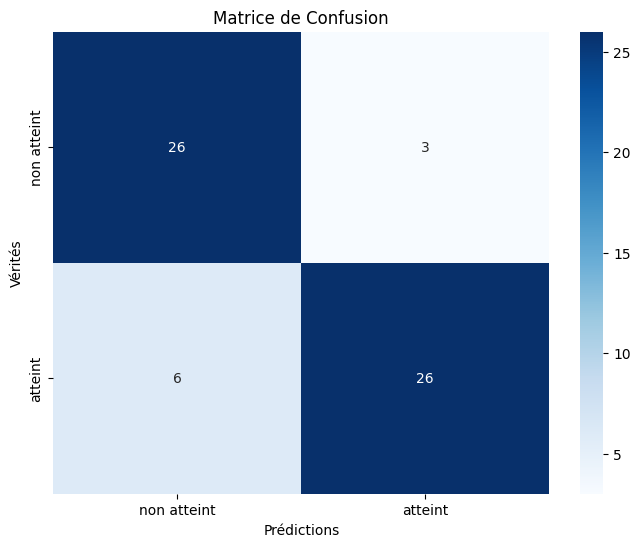

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["non atteint", "atteint"], yticklabels=["non atteint", "atteint"])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de Confusion")
plt.show()